In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Load Student Dataset
df = pd.read_csv("student_dataset.csv")

In [18]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             1000 non-null   int64  
 1   Study_Hours            1000 non-null   float64
 2   Attendance             1000 non-null   int64  
 3   Assignments_Completed  1000 non-null   int64  
 4   Exam_Score             1000 non-null   float64
 5   Pass                   1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB
None
        Student_ID  Study_Hours   Attendance  Assignments_Completed  \
count  1000.000000   1000.00000  1000.000000            1000.000000   
mean    500.500000      4.90247    74.695000               4.451000   
std     288.819436      2.92141    14.497453               2.813452   
min       1.000000      0.05000    50.000000               0.000000   
25%     250.750000      2.35750    62.000000               2.000000 

In [3]:
# Data Exploration
print(df.head())
print(df.isnull().sum())

   Student_ID  Study_Hours  Attendance  Assignments_Completed  Exam_Score  \
0           1         3.75          96                      5       37.37   
1           2         9.51          61                      9       41.72   
2           3         7.32          65                      3       98.04   
3           4         5.99          73                      4       45.99   
4           5         1.56          68                      8       98.42   

   Pass  
0     0  
1     0  
2     0  
3     0  
4     0  
Student_ID               0
Study_Hours              0
Attendance               0
Assignments_Completed    0
Exam_Score               0
Pass                     0
dtype: int64


In [19]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Student_ID               0
Study_Hours              0
Attendance               0
Assignments_Completed    0
Exam_Score               0
Pass                     0
dtype: int64


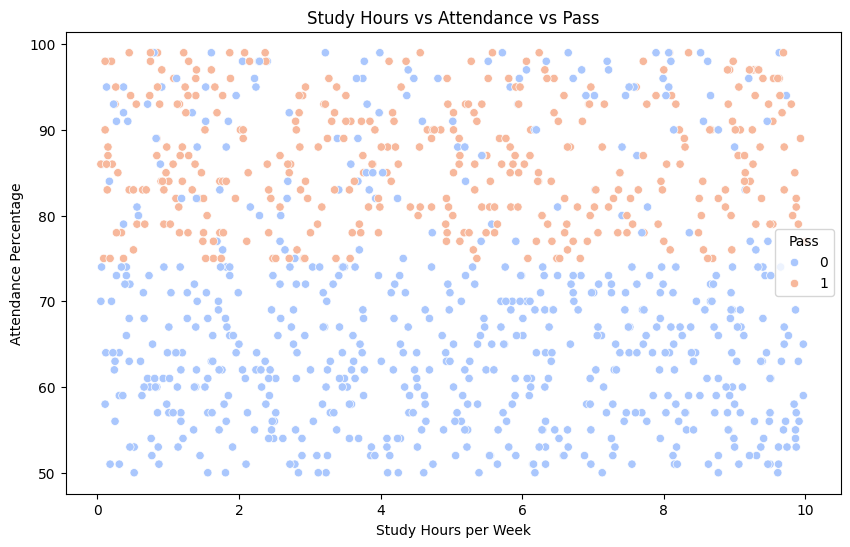

In [21]:
# Visualizing Study Hours vs. Attendance vs. Pass
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Study_Hours", y="Attendance", hue="Pass", palette="coolwarm")
plt.title("Study Hours vs Attendance vs Pass")
plt.xlabel("Study Hours per Week")
plt.ylabel("Attendance Percentage")
plt.show()

In [23]:
# Splitting dataset into training and testing
X = df[['Study_Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Predictions
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1]


In [26]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.825
Confusion Matrix:
 [[107  18]
 [ 17  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       125
           1       0.76      0.77      0.77        75

    accuracy                           0.82       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.83      0.82      0.83       200



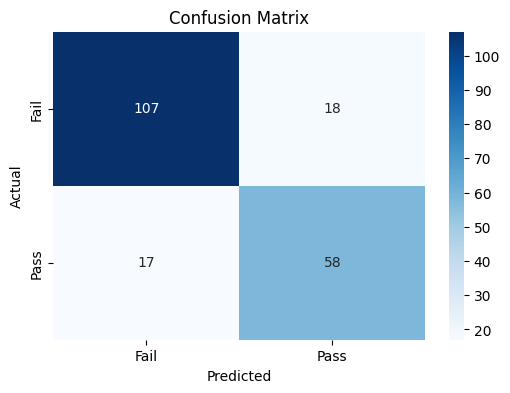

In [28]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred contain the actual and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()